# Games.csv Stats

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
netattacks = pd.read_csv('/Users/leahmandrova/Desktop/games1.csv', index_col= None)

In [6]:
netattacks.head()

,gameId,season,week,gameDate,gameTimeEastern,gameTimeLocal,homeTeamId,visitorTeamId,seasonType,weekNameAbbr,siteId,homeTeamDistance,visitingTeamDistance,homeTeamFinalScore,visitingTeamFinalScore,winningTeam,Score difference,Tie,scorediff
0,27167,2004,0,8/9/2004,20:09:00,20:09:00,5110,1400,PRE,HOF,1900,241,1237,20,17,5110,3,0,3
1,27168,2004,1,8/12/2004,20:05:00,20:05:00,325,200,PRE,P1,3695,13,535,24,0,325,24,0,24
2,27169,2004,1,8/12/2004,20:00:00,19:00:00,2510,810,PRE,P1,1006,17,277,10,13,810,-3,0,3
3,27170,2004,1,8/13/2004,20:05:00,20:05:00,3410,2310,PRE,P1,3757,1,1086,34,24,3410,10,0,10
4,27171,2004,1,8/13/2004,20:05:00,19:05:00,3300,3430,PRE,P1,2870,9,1155,23,13,3300,10,0,10


<AxesSubplot:>

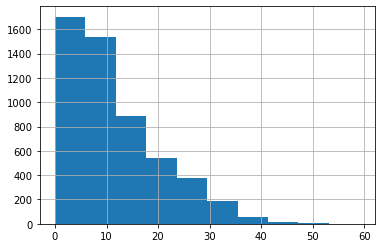

In [7]:
netattacks['scorediff'].hist()


In [8]:
netattacks['season'].corr(netattacks['siteId'])
netattacks.corr()

,gameId,season,week,homeTeamId,visitorTeamId,siteId,homeTeamDistance,visitingTeamDistance,homeTeamFinalScore,visitingTeamFinalScore,winningTeam,Score difference,Tie,scorediff
gameId,1.000000,0.845715,0.009239,-0.004439,-0.002877,0.034685,0.035117,0.012327,0.048569,0.071500,-0.005239,-0.014792,0.017759,-0.005980
season,0.845715,1.000000,0.023060,-0.005714,-0.000732,0.059752,0.049874,0.023601,0.037637,0.076502,-0.007400,-0.026007,0.021150,-0.021774
week,0.009239,0.023060,1.000000,-0.000611,-0.002199,-0.004819,-0.022828,0.029562,0.061586,0.056604,0.007068,0.004727,-0.003413,0.066697
homeTeamId,-0.004439,-0.005714,-0.000611,1.000000,-0.010154,-0.016264,0.006278,0.189729,0.013174,-0.004154,0.566345,0.012223,-0.011307,0.004850
visitorTeamId,-0.002877,-0.000732,-0.002199,-0.010154,1.000000,-0.006967,0.005554,0.194353,0.002611,0.031567,0.417114,-0.019910,0.009526,-0.012202
siteId,0.034685,0.059752,-0.004819,-0.016264,-0.006967,1.000000,0.123924,0.066984,0.027961,-0.015600,-0.012500,0.030621,0.004806,-0.009548
homeTeamDistance,0.035117,0.049874,-0.022828,0.006278,0.005554,0.123924,1.000000,0.361201,-0.022996,0.029912,0.006116,-0.036961,0.037068,0.017367
visitingTeamDistance,0.012327,0.023601,0.029562,0.189729,0.194353,0.066984,0.361201,1.000000,0.053317,0.037489,0.184613,0.012031,0.003963,0.026672
homeTeamFinalScore,0.048569,0.037637,0.061586,0.013174,0.002611,0.027961,-0.022996,0.053317,1.000000,-0.020286,0.004970,0.724437,0.010617,0.220981
visitingTeamFinalScore,0.071500,0.076502,0.056604,-0.004154,0.031567,-0.015600,0.029912,0.037489,-0.020286,1.000000,0.004911,-0.703896,0.021988,-0.086538


<AxesSubplot:xlabel='scorediff', ylabel='homeTeamFinalScore'>

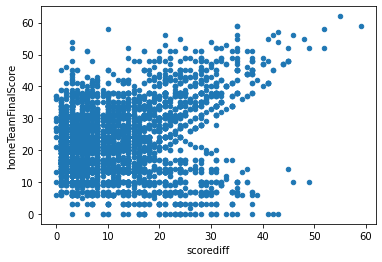

In [9]:
netattacks.plot.scatter('scorediff','homeTeamFinalScore')

# Q1. Is there any Correlation between home team and its winning chances?

1 sol. We can observe that there is a significant correlation between Score difference and homeTeamFinalScore. The home team scores more on its homeground (This is determined with the strong positive correlation between score difference and hometeamfinal score, since score difference is an indicator of which team is winning.)
Another observation : There is a small negative correlation between hometeamDistance and homeTeamFinalScore. (can be ignored)

In [10]:
netattacks.describe(include='all')

,gameId,season,week,gameDate,gameTimeEastern,gameTimeLocal,homeTeamId,visitorTeamId,seasonType,weekNameAbbr,siteId,homeTeamDistance,visitingTeamDistance,homeTeamFinalScore,visitingTeamFinalScore,winningTeam,Score difference,Tie,scorediff
count,5308.000000,5308.000000,5308.000000,5308,5308,5308,5308.000000,5308.000000,5308,5308,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000,5308.000000
unique,NaN,NaN,NaN,1074,209,267,NaN,NaN,7,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,12/28/2014,13:02:00,13:02:00,NaN,NaN,REG,Week 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16,833,595,NaN,NaN,4096,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,47755.608139,2011.494160,7.672946,NaN,NaN,NaN,2522.213640,2523.301620,NaN,NaN,2885.863037,43.195554,915.190844,22.662208,20.456669,2532.541447,2.205539,0.002449,11.351733
std,12798.561217,4.609467,5.303671,NaN,NaN,NaN,1388.532684,1387.289366,NaN,NaN,1395.662911,360.892439,678.591778,10.193357,9.892536,1389.413910,14.347755,0.049433,9.046395
min,26909.000000,2004.000000,0.000000,NaN,NaN,NaN,200.000000,200.000000,NaN,NaN,1001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-49.000000,0.000000,0.000000
25%,29524.750000,2007.000000,3.000000,NaN,NaN,NaN,1400.000000,1400.000000,NaN,NaN,1769.000000,1.000000,411.000000,16.000000,13.000000,1400.000000,-7.000000,0.000000,4.000000
50%,55499.500000,2011.000000,7.000000,NaN,NaN,NaN,2510.000000,2510.000000,NaN,NaN,2769.000000,8.000000,739.000000,23.000000,20.000000,2510.000000,3.000000,0.000000,8.000000
75%,56831.250000,2015.000000,12.000000,NaN,NaN,NaN,3700.000000,3700.000000,NaN,NaN,3757.000000,14.000000,1257.000000,30.000000,27.000000,3700.000000,10.000000,0.000000,17.000000


In [11]:
netattacks['week'].corr(netattacks['siteId'])
netattacks.corr()

,gameId,season,week,homeTeamId,visitorTeamId,siteId,homeTeamDistance,visitingTeamDistance,homeTeamFinalScore,visitingTeamFinalScore,winningTeam,Score difference,Tie,scorediff
gameId,1.000000,0.845715,0.009239,-0.004439,-0.002877,0.034685,0.035117,0.012327,0.048569,0.071500,-0.005239,-0.014792,0.017759,-0.005980
season,0.845715,1.000000,0.023060,-0.005714,-0.000732,0.059752,0.049874,0.023601,0.037637,0.076502,-0.007400,-0.026007,0.021150,-0.021774
week,0.009239,0.023060,1.000000,-0.000611,-0.002199,-0.004819,-0.022828,0.029562,0.061586,0.056604,0.007068,0.004727,-0.003413,0.066697
homeTeamId,-0.004439,-0.005714,-0.000611,1.000000,-0.010154,-0.016264,0.006278,0.189729,0.013174,-0.004154,0.566345,0.012223,-0.011307,0.004850
visitorTeamId,-0.002877,-0.000732,-0.002199,-0.010154,1.000000,-0.006967,0.005554,0.194353,0.002611,0.031567,0.417114,-0.019910,0.009526,-0.012202
siteId,0.034685,0.059752,-0.004819,-0.016264,-0.006967,1.000000,0.123924,0.066984,0.027961,-0.015600,-0.012500,0.030621,0.004806,-0.009548
homeTeamDistance,0.035117,0.049874,-0.022828,0.006278,0.005554,0.123924,1.000000,0.361201,-0.022996,0.029912,0.006116,-0.036961,0.037068,0.017367
visitingTeamDistance,0.012327,0.023601,0.029562,0.189729,0.194353,0.066984,0.361201,1.000000,0.053317,0.037489,0.184613,0.012031,0.003963,0.026672
homeTeamFinalScore,0.048569,0.037637,0.061586,0.013174,0.002611,0.027961,-0.022996,0.053317,1.000000,-0.020286,0.004970,0.724437,0.010617,0.220981
visitingTeamFinalScore,0.071500,0.076502,0.056604,-0.004154,0.031567,-0.015600,0.029912,0.037489,-0.020286,1.000000,0.004911,-0.703896,0.021988,-0.086538


# combine.csv Data Set

In [13]:
combo = pd.read_csv('/Users/leahmandrova/Desktop/Footballfinal/combine 2.csv', index_col= None)

In [14]:
combo.head()

,combineId,playerId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,nameFull,...,hsCountry,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
0,10000,19870067,1987,CB,69.8,198,8.50,Michael,Adams,Michael Adams,...,NaN,30.50,4.42,32.0,13.0,4.60,118.0,NaN,11.91,NaN
1,10001,19870154,1987,C,74.8,266,10.25,John,Adickes,John Adickes,...,NaN,30.00,4.97,26.5,25.0,4.60,103.0,NaN,NaN,NaN
2,10002,19870800,1987,FB,71.8,217,9.00,Tommy,Agee,Tommy Agee,...,NaN,30.75,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
3,10003,19870121,1987,C,75.0,279,10.50,David,Alexander,David Alexander,...,NaN,32.75,5.13,27.5,22.0,4.33,105.0,NaN,NaN,NaN
4,10004,19870801,1987,WR,72.1,202,10.00,Lyneal,Alston,Lyneal Alston,...,NaN,33.00,4.64,32.0,7.0,4.52,114.0,NaN,11.85,NaN


<AxesSubplot:>

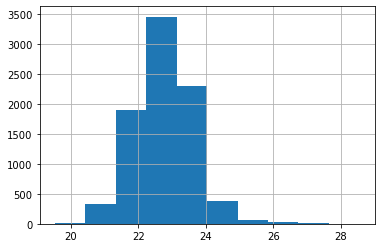

In [15]:
combo['ageAtDraft'].hist()

In [16]:
combo.describe(include='all')

,combineId,playerId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,nameFull,...,hsCountry,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic
count,10080.000000,1.008000e+04,10080.000000,10080,10080.000000,10080.000000,3592.000000,10078,10078,10078,...,4172,3277.000000,9022.000000,8461.000000,7168.000000,7486.000000,8311.000000,4814.000000,1773.000000,365.000000
unique,NaN,NaN,NaN,26,NaN,NaN,NaN,2486,4631,9813,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,WR,NaN,NaN,NaN,Chris,Johnson,Steve Smith,...,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1325,NaN,NaN,NaN,193,169,6,...,4158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15089.350893,2.002596e+07,2002.561706,NaN,73.743500,240.129762,9.504279,NaN,NaN,NaN,...,NaN,32.141559,4.825943,32.061813,19.820173,4.402701,112.538323,7.337308,11.741856,24.175342
std,2987.981163,9.639241e+04,9.642316,NaN,2.637111,44.789763,0.647266,NaN,NaN,NaN,...,NaN,1.558978,0.309737,4.203256,6.509861,0.267464,9.326537,0.443404,0.433197,7.627448
min,10000.000000,1.987000e+07,1987.000000,NaN,64.900000,142.000000,7.130000,NaN,NaN,NaN,...,NaN,25.630000,4.210000,17.500000,1.000000,3.730000,7.000000,6.340000,10.580000,4.000000
25%,12519.750000,1.994010e+07,1994.000000,NaN,71.900000,203.000000,9.130000,NaN,NaN,NaN,...,NaN,31.000000,4.580000,29.000000,15.000000,4.200000,106.000000,7.000000,11.450000,20.000000
50%,15039.500000,2.002025e+07,2002.000000,NaN,74.000000,232.000000,9.500000,NaN,NaN,NaN,...,NaN,32.130000,4.750000,32.000000,20.000000,4.360000,113.000000,7.250000,11.700000,24.000000
75%,17560.250000,2.011043e+07,2011.000000,NaN,75.800000,274.000000,10.000000,NaN,NaN,NaN,...,NaN,33.130000,5.040000,35.000000,24.000000,4.570000,119.000000,7.610000,12.000000,29.000000


In [17]:
# store stats in a dataframe
df_stats = combo.describe(include='all')
# save dataframe to file
df_stats.to_csv('datastats/career_sum.csv')

In [18]:
# The first two are good if you want other stats besides count
# e.g. mean or standard deviation
type_counts = combo.groupby('combine40yd').count()
type_means = combo.groupby('combine40yd').mean()

# get a multi-index with multiple stats
type_counts = combo.groupby('combine40yd').agg(['count', 'mean'])

# cleanest for just counts
type_counts = combo['combine40yd'].value_counts()
type_counts.head()

/var/folders/bq/04r_c7yx00g5bfndfn419zsh0000gn/T/ipykernel_24489/229864827.py:7: FutureWarning: ['combinePosition', 'nameFirst', 'nameLast', 'nameFull', 'position', 'nflId', 'college', 'dob', 'playerProfileUrl', 'homeCity', 'homeState', 'homeCountry', 'highSchool', 'hsCity', 'hsState', 'hsCountry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  type_counts = combo.groupby('combine40yd').agg(['count', 'mean'])


4.65    176
4.62    169
4.61    161
4.50    160
4.59    156
Name: combine40yd, dtype: int64

Observation : Combine40yd and weight, positive correlation of 0.82 the lower the weight the faster you will run the 40 yard dash.

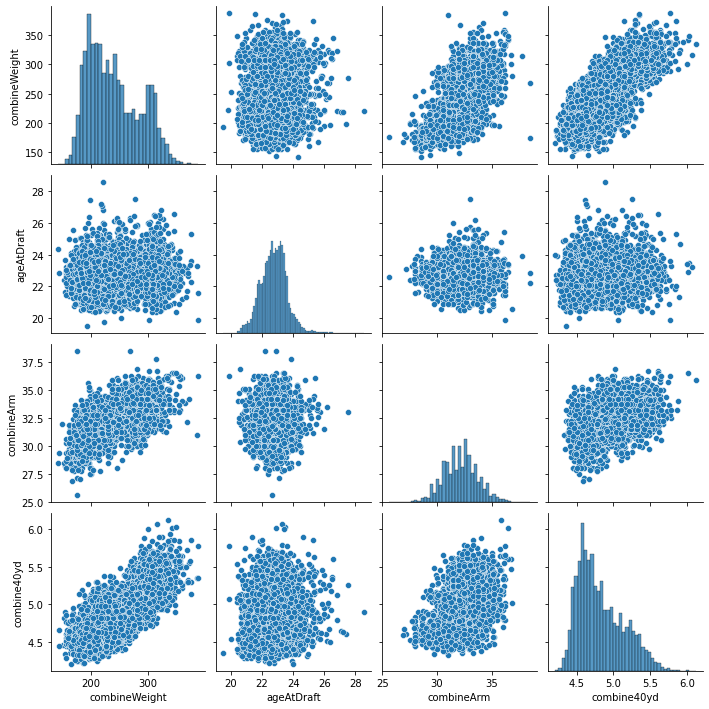

In [19]:
df = combo[['combineWeight', 'ageAtDraft', 'combineArm','combine40yd']]
sns.pairplot(df, kind="scatter")
plt.show()

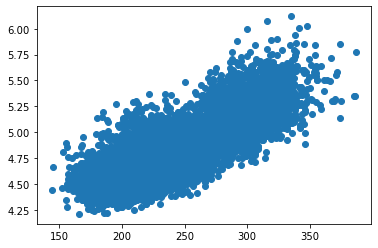

In [20]:
plt.scatter(combo['combineWeight'], combo['combine40yd'])
plt.show()

In [21]:
from scipy.stats import linregress
linregress(combo['combineWeight'], combo['ageAtDraft'])

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In [22]:
import csv as csv 
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from random import randint
from scipy import stats  

#Here are the sklearn libaries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.decomposition import PCA


In [23]:
rf = ExtraTreesClassifier(n_estimators=500, random_state=0)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import metrics


In [25]:
combo['combineVert'] = np.where(combo['combineArm'] == 'win','lose','tie' )

In [26]:
train, test = train_test_split(combo, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

Rows in train: 7560
Rows in test: 2520


In [27]:
# get columns not label
pred_vars = list(combo.columns)

# remove 'label' because it is what we are trying to predict
pred_vars.remove('ageAtDraft')

In [28]:
train_X = train[pred_vars]
train_y = train['ageAtDraft']

In [29]:
dt = tree.DecisionTreeClassifier(criterion="gini")
dt.fit(train.loc[:, pred_vars], train['combineYear'])
print(dt.feature_importances_)

ValueError: could not convert string to float: 'RB'

In [30]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(dt, prefit=True)

In [31]:
from sklearn.feature_selection import SelectKBest
model = SelectKBest (score_func= callable )


In [32]:
# fit with reduced set of columns
dt_reduced = tree.DecisionTreeClassifier()
dt_reduced.fit(X_reduced, train_y)

NameError: name 'X_reduced' is not defined

In [33]:
test_X = test[pred_vars]
test_X_reduced = test_X.iloc[:, support]
test_y = test['combineId']

NameError: name 'support' is not defined

In [34]:
# list of our models
fitted = [dt, dt_reduced,]

# list of test sets for each
test_sets = [test_X, test_X_reduced]

# empty dataframe to store the results
result_table = pd.DataFrame(columns=['classifier_name', 'fpr','tpr','auc', 
                                     'log_loss', 'dt_report'])

for i in range(len(fitted)):
    # select classifier and testing data
    dt = fitted[i]
    test_ = test_sets[i]

    # print the name of the classifier
    print(dt.__class__.__name__)
    
    # get predictions
    yproba = dt.predict_proba(test_)
    yclass = dt.predict(test_)
    
    # auc information
    fpr, tpr, _ = metrics.roc_curve(test_y,  yproba[:,1])
    auc = metrics.roc_auc_score(test_y, yproba[:,1])
    
    # log loss
    log_loss = metrics.log_loss(test_y, yproba[:,1])
    
    # add some other stats based on confusion matrix
    dt_report = metrics.classification_report(test_y, yclass, digits=5)
    
    # add the results to the dataframe
    result_table = result_table.append({'classifier_name':dt.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'log_loss': log_loss,
                                        'dt_report': dt_report}, ignore_index=True)
#result_table.set_index('classifier_name', inplace=True)

NameError: name 'test_X_reduced' is not defined

# basic stats

In [36]:
#create a data frame 
stats = pd.read_csv('/Users/leahmandrova/Desktop/Basic_Stats.csv')

In [37]:
stats.head(10)

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/21,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/30,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/60,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/86,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/92,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
5,NaN,"Sumner , IL",9/11/1892,Illinois,Retired,NaN,1 Season,73.0,NaN,NaN,"Petty, Ross",NaN,rosspetty/2523136,NaN,180.0,1920 - 1920
6,NaN,"Casper , WY",9/16/20,Wisconsin,Retired,NaN,3 Seasons,73.0,NaN,NaN,"Farris, Tom",NaN,tomfarris/2513861,NaN,185.0,1946 - 1948
7,22.0,"Navarre , FL",1/31/95,Clemson,Active,New York Jets,Rookie,77.0,Navarre HS,FL,"Leggett, Jordan",NaN,jordanleggett/2557885,TE,250.0,NaN
8,NaN,NaN,NaN,No College,Retired,NaN,1 Season,NaN,NaN,NaN,"Thompson, Pinky",NaN,pinkythompson/2527303,NaN,NaN,1927 - 1927
9,98.0,"Alverton , PA",2/23/19,Duquesne,Retired,NaN,1 Season,70.0,NaN,NaN,"Gonda, George",NaN,georgegonda/2515030,NaN,175.0,1942 - 1942


In [38]:
#determine the number of missing values for each column
stats.isna().sum()

Age                      3668
Birth Place              2378
Birthday                  337
College                    39
Current Status              0
Current Team            14076
Experience                 39
Height (inches)           146
High School             14658
High School Location    14662
Name                        0
Number                  15464
Player Id                   0
Position                14076
Weight (lbs)               51
Years Played             3096
dtype: int64

In [39]:
stats_dropna = stats.replace('', np.nan)
stats_clean = stats_dropna.dropna(subset=['Birth Place'], how = 'any')
stats_clean.isna().sum()

Age                      3282
Birth Place                 0
Birthday                    0
College                     0
Current Status              0
Current Team            12280
Experience                  0
Height (inches)            70
High School             12464
High School Location    12467
Name                        0
Number                  13163
Player Id                   0
Position                12280
Weight (lbs)                5
Years Played             2514
dtype: int64

In [40]:
stats_clean.shape

(14794, 16)

In [41]:
# we can geocode the birthplace cities
#lets rename Birth Place field to remove the space
stats_clean.rename(columns={'Birth Place': 'BirthPlace'}, inplace=True)


/var/folders/bq/04r_c7yx00g5bfndfn419zsh0000gn/T/ipykernel_24489/353655717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_clean.rename(columns={'Birth Place': 'BirthPlace'}, inplace=True)


In [42]:
stats_clean.head(10)

,Age,BirthPlace,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/21,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/30,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/60,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/86,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/92,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
5,NaN,"Sumner , IL",9/11/1892,Illinois,Retired,NaN,1 Season,73.0,NaN,NaN,"Petty, Ross",NaN,rosspetty/2523136,NaN,180.0,1920 - 1920
6,NaN,"Casper , WY",9/16/20,Wisconsin,Retired,NaN,3 Seasons,73.0,NaN,NaN,"Farris, Tom",NaN,tomfarris/2513861,NaN,185.0,1946 - 1948
7,22.0,"Navarre , FL",1/31/95,Clemson,Active,New York Jets,Rookie,77.0,Navarre HS,FL,"Leggett, Jordan",NaN,jordanleggett/2557885,TE,250.0,NaN
9,98.0,"Alverton , PA",2/23/19,Duquesne,Retired,NaN,1 Season,70.0,NaN,NaN,"Gonda, George",NaN,georgegonda/2515030,NaN,175.0,1942 - 1942
10,NaN,"Orlando , FL",3/8/45,Tennessee Tech,Retired,NaN,3 Seasons,76.0,NaN,NaN,"Tanner, John",NaN,johntanner/2527011,NaN,231.0,1971 - 1974


In [43]:
#Retrieve the number of players borm in city
counts = stats_clean['BirthPlace'].value_counts()
countsdf = pd.DataFrame(counts)
countsdf.shape

(4487, 1)

In [44]:
countsdf  = countsdf.reset_index().rename(columns={' ':'CityState'})
countsdf.rename(columns={'index': 'CityState','BirthPlace': 'freq'}, inplace=True)
countsdf.head()

,CityState,freq
0,"Los Angeles , CA",304
1,"Chicago , IL",273
2,"Houston , TX",220
3,"Miami , FL",176
4,"Dallas , TX",163


In [45]:
countsdf['CityState'] = countsdf['CityState'].str.replace(' ,', ',')
countsdf.head()

,CityState,freq
0,"Los Angeles, CA",304
1,"Chicago, IL",273
2,"Houston, TX",220
3,"Miami, FL",176
4,"Dallas, TX",163


In [46]:
citiesreduced = countsdf['freq'] > 10 #there needs to be ten or more football players per city 
countsdf = countsdf[citiesreduced ]
countsdf.shape

(188, 2)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [48]:
df = pd.read_csv('/Users/leahmandrova/Desktop/Basic_Stats.csv')

In [49]:
df.dtypes

Age                     float64
Birth Place              object
Birthday                 object
College                  object
Current Status           object
Current Team             object
Experience               object
Height (inches)         float64
High School              object
High School Location     object
Name                     object
Number                  float64
Player Id                object
Position                 object
Weight (lbs)            float64
Years Played             object
dtype: object

In [50]:
#I will rename the weight and height column so i can work on it easier
df.rename(columns={'Height (inches)':'Height',
                  'Weight (lbs)':'Weight'}, inplace = True)
#Let's check how many columns have a null value
df.isnull().sum()

Age                      3668
Birth Place              2378
Birthday                  337
College                    39
Current Status              0
Current Team            14076
Experience                 39
Height                    146
High School             14658
High School Location    14662
Name                        0
Number                  15464
Player Id                   0
Position                14076
Weight                     51
Years Played             3096
dtype: int64

In [51]:
df.dropna(subset=['Age','Birthday','Height','Weight'],inplace=True)
df.shape

(13496, 16)

In [52]:
#A quick analysis of Years Played and Current Team, and Current Status
print(df['Current Status'].value_counts())
#Separate the start and end dates for non null items in years played
df['start_year'] = df['Years Played'].astype(str).str[:4]
df['end_year'] = df['Years Played'].astype(str).str[7:]

df.Experience.value_counts()[:10]

Retired                         10537
Active                           2742
Unsigned free agent               199
Injured reserve                    13
Suspended                           4
Physically unable to perform        1
Name: Current Status, dtype: int64


1 Season      3191
2 Seasons     1543
3 Seasons      994
4 Seasons      830
5 Seasons      646
Rookie         640
6 Seasons      584
7 Seasons      479
2nd season     463
8 Seasons      439
Name: Experience, dtype: int64

In [53]:
df['Experience'] = df['Experience'].str.split(" ")
df['Experience'] = [i[0] for i in df['Experience']]

In [54]:
#Extract number from string
num = list()
for i in df['Experience']:
    result = re.sub('[^0-9]',"", i)
    if result == "":
        result == 0
    num.append(result)
df['Experience'] = num
#Replace blank values which were Rookies to 0
num = list()
for i in df['Experience']:
    if i == "":
        i = 0
    num.append(i)
df['Experience'] = num
#Make Experience column INT Data type
df.Experience = df.Experience.astype(int)

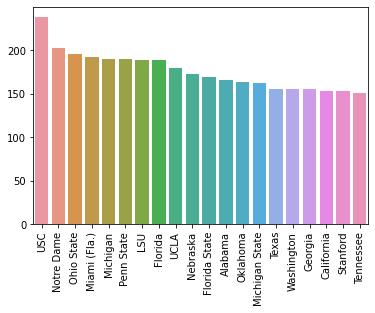

In [55]:
top_20 = df.College.value_counts()[:20]

fig, ax = plt.subplots()
ax = sns.barplot(x = top_20.index, y = top_20.values)
ax.set_xticklabels(top_20.index, rotation=90)
plt.show()

/Users/leahmandrova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


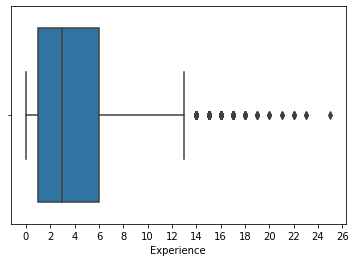

In [56]:
ax = sns.boxplot(df.Experience, orient = "h")
ax.set_xticks(np.arange(0,28,2))
plt.show()

In [57]:
#First we will get the average career length of these top schools
df_group_col = df.groupby("College", as_index = False).mean()

In [58]:
top_20 = df_group_col[df_group_col['College'].isin(list(top_20.index))]
top_20_weight = top_20.Weight.mean()
avg_weight = df.Weight.mean()
print("Top 20 schools average weight = " + str(top_20_weight))
print("Average Weight of all schools = " + str(avg_weight))

Top 20 schools average weight = 237.71448916674422
Average Weight of all schools = 235.57802311796087


In [59]:
from scipy import stats
stats.ttest_1samp(a = top_20.Weight,
                 popmean= df['Weight'].mean())

Ttest_1sampResult(statistic=3.4073931702558173, pvalue=0.0029546365091745333)

#

# Spread spoke Scores- trying to run classifiers

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import metrics
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import explained_variance_score as evs
from sklearn.linear_model import Ridge # Ridge algorithm
import seaborn as sns
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [64]:
datascores = pd.read_csv('/Users/leahmandrova/Desktop/Footballfinal/datastats/scoresrefined.csv', keep_default_na=False)

In [65]:
cols = pd.read_csv('/Users/leahmandrova/Desktop/Footballfinal/datastats/scoresrefined.csv', nrows=1).columns
datascores = pd.read_csv('/Users/leahmandrova/Desktop/Footballfinal/datastats/scoresrefined.csv', usecols=cols)

In [66]:
datascores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,Unnamed: 4,score_home,score_away,Unnamed: 7,team_favorite_id,spread_favorite,over_under_line,Unnamed: 11,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,results
0,9/2/66,1966,1,False,NaN,14.0,23.0,NaN,NaN,NaN,NaN,NaN,False,83.0,6.0,71.0,NaN,0
1,9/3/66,1966,1,False,NaN,45.0,7.0,NaN,NaN,NaN,NaN,NaN,False,81.0,7.0,70.0,NaN,1
2,9/4/66,1966,1,False,NaN,27.0,7.0,NaN,NaN,NaN,NaN,NaN,False,70.0,7.0,82.0,NaN,1
3,9/9/66,1966,2,False,NaN,14.0,19.0,NaN,NaN,NaN,NaN,NaN,False,82.0,11.0,78.0,NaN,0
4,9/10/66,1966,1,False,NaN,24.0,3.0,NaN,NaN,NaN,NaN,NaN,False,64.0,8.0,62.0,NaN,1


result = difference of home vs away score,

 1 is home won
0 is home lost. 

stadiums: houston Astrodome -- not affect by weather



weather_ detail: DOME= safe -- show that in int?

In [67]:


np.where(datascores['results'] == '0', datascores['results'], 1)

array([1, 1, 1, ..., 1, 1, 1])

In [68]:
train, test = train_test_split(datascores,test_size=0.33, random_state=42)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

Rows in train: 9047
Rows in test: 4457


In [70]:
datascores["weather_humidity"] = [float(str(i).replace(",", "")) for i in datascores["weather_humidity"]]

In [71]:
datascores["results"] = (datascores["score_home"]>=datascores["score_away"]).astype(int)

In [72]:
print(datascores)

      schedule_date  schedule_season schedule_week  schedule_playoff  \
0            9/2/66             1966             1             False   
1            9/3/66             1966             1             False   
2            9/4/66             1966             1             False   
3            9/9/66             1966             2             False   
4           9/10/66             1966             1             False   
...             ...              ...           ...               ...   
13499        1/8/23             2022            18             False   
13500        1/8/23             2022            18             False   
13501        1/8/23             2022            18             False   
13502        1/8/23             2022            18             False   
13503        1/8/23             2022            18             False   

       Unnamed: 4  score_home  score_away  Unnamed: 7 team_favorite_id  \
0             NaN        14.0        23.0         NaN        

In [73]:
y_train = datascores["results"].values
X_train = datascores["weather_humidity"].values
y_test = datascores["results"].values
X_test = datascores["weather_humidity"].values


In [74]:
datascores['result'] = np.where(datascores['weather_humidity'] == 'win','lose','tie') 

In [75]:
train, test = train_test_split(netattacks, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))

Rows in train: 3981
Rows in test: 1327


In [76]:
pred_vars = ['weather_humidity', 'weather_temperature', 'weather_wind_mph',]

In [77]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [78]:
datascores['results'].dtype

dtype('int64')

In [79]:
datascores['weather_humidity'].dtype

dtype('float64')

In [80]:
# shape of the dataframe
datascores.shape

# data type of each column
datascores.dtypes

# number of null values
datascores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13504 entries, 0 to 13503
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13504 non-null  object 
 1   schedule_season      13504 non-null  int64  
 2   schedule_week        13504 non-null  object 
 3   schedule_playoff     13504 non-null  bool   
 4   Unnamed: 4           0 non-null      float64
 5   score_home           13412 non-null  float64
 6   score_away           13412 non-null  float64
 7   Unnamed: 7           0 non-null      float64
 8   team_favorite_id     10933 non-null  object 
 9   spread_favorite      10933 non-null  float64
 10  over_under_line      10923 non-null  object 
 11  Unnamed: 11          0 non-null      float64
 12  stadium_neutral      13504 non-null  bool   
 13  weather_temperature  12281 non-null  float64
 14  weather_wind_mph     12265 non-null  float64
 15  weather_humidity     8441 non-null  

In [81]:
datascores.results.nunique()
datascores.results.unique()
# array(['Win', 'Lose', 'Tie], dtype=object)

array([0, 1])

In [82]:
print(datascores.dtypes)

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
Unnamed: 4             float64
score_home             float64
score_away             float64
Unnamed: 7             float64
team_favorite_id        object
spread_favorite        float64
over_under_line         object
Unnamed: 11            float64
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
results                  int64
result                  object
dtype: object


In [83]:
import pandas as pd

# Create a sample DataFrame
datascores = pd.DataFrame({
    'weather_temperature': [83.0, 81.0, 70.0, 82.0, 64.0],
    'weather_wind_mph': [6.0, 7.0, 7.0, 11.0, 8.0],
    'weather_humidity': [71.0, 70.0, 82.0, 78.0, 62.0],
})

# Use column names to access the 'weather_temperature' column
print(datascores.loc[:, ['weather_temperature', 'weather_wind_mph', 'weather_humidity']])


   weather_temperature  weather_wind_mph  weather_humidity
0                 83.0               6.0              71.0
1                 81.0               7.0              70.0
2                 70.0               7.0              82.0
3                 82.0              11.0              78.0
4                 64.0               8.0              62.0


In [84]:
pred_vars = [ 'weather_temperature', 'weather_wind_mph', 'weather_humidity']
print(datascores.loc[:, pred_vars])

   weather_temperature  weather_wind_mph  weather_humidity
0                 83.0               6.0              71.0
1                 81.0               7.0              70.0
2                 70.0               7.0              82.0
3                 82.0              11.0              78.0
4                 64.0               8.0              62.0


In [85]:
datascores = datascores.fillna(0)
>>> datascores.weather_humidity.astype(int)

0    71
1    70
2    82
3    78
4    62
Name: weather_humidity, dtype: int64

In [86]:
datascores = datascores.fillna(0)
>>> datascores.weather_temperature.astype(int)

0    83
1    81
2    70
3    82
4    64
Name: weather_temperature, dtype: int64

In [87]:
datascores = datascores.fillna(0)
>>> datascores.weather_wind_mph.astype(int)

0     6
1     7
2     7
3    11
4     8
Name: weather_wind_mph, dtype: int64

In [88]:
datascores.columns = datascores.columns.str.strip()

In [89]:
datascores = pd.read_csv('/Users/leahmandrova/Desktop/Footballfinal/datastats/scoresrefined.csv')
datascores.results

0        0
1        1
2        1
3        0
4        1
        ..
13499    0
13500    0
13501    0
13502    0
13503    0
Name: results, Length: 13504, dtype: int64

In [90]:
datascores = pd.read_csv('/Users/leahmandrova/Desktop/Footballfinal/datastats/scoresrefined.csv')
datascores.weather_temperature

0        83.0
1        81.0
2        70.0
3        82.0
4        64.0
         ... 
13499     NaN
13500     NaN
13501     NaN
13502     NaN
13503     NaN
Name: weather_temperature, Length: 13504, dtype: float64

In [91]:
#y = datascores.results
#datascores.drop(['results'], axis=1, inplace=True)
#X = datascores [pred_vars]
 
# Now we split the dataset in train and test part
# here the train set is 75% and test set is 25%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [92]:
X_var = datascores.weather_wind_mph.values
y_var = datascores['results']

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(('X_train samples : '), X_train[0:5])
print(('X_test samples : '), X_test[0:5])
print(('y_train samples : '), y_train[0:5])
print(('y_test samples : '), y_test[0:5])

X_train samples :  [ 9.  8.  6. 15. 10.]
X_test samples :  [14.  9. 17.  2.  9.]
y_train samples :  2694    0
9476    1
6658    1
8306    1
3203    0
Name: results, dtype: int64
y_test samples :  1427     0
11274    0
5928     0
12036    0
4159     1
Name: results, dtype: int64


In [93]:
converted_values = np.nan_to_num('weather_wind_mph')
converted_values = np.nan_to_num('weather_temperature')
converted_values = np.nan_to_num('weather_humidity')

In [99]:
# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


NameError: name 'LinearRegression' is not defined

In [ ]:
# 2. Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

In [ ]:
# 3. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)


In [ ]:
# Decision tree
dt = tree.DecisionTreeClassifier(criterion="gini")
dt.fit(X_train, y_train)
dt_yhat = dt.predict(X_test)

In [ ]:
print(('EXPLAINED VARIANCE SCORE:'))

print(('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat))))

print(('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat))))

print(('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat))))
print(('Explained Variance Score of Decision tree model is {}'.format(evs(y_test, dt_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of OLS model is -3.443495991661827e-05
Explained Variance Score of Ridge model is -3.443241636658101e-05
Explained Variance Score of Bayesian model is 0.0002694962013571889
Explained Variance Score of Decision tree model is -0.9488947470630384


In [ ]:
datascores.loc[datascores['results']]

,schedule_date,schedule_season,schedule_week,schedule_playoff,Unnamed: 4,score_home,score_away,Unnamed: 7,team_favorite_id,spread_favorite,over_under_line,Unnamed: 11,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,results,result
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
1,9/3/66,1966,1,False,0.0,45.0,7.0,0.0,0,0.0,0,0.0,False,81.0,7.0,70.0,0,1,tie
1,9/3/66,1966,1,False,0.0,45.0,7.0,0.0,0,0.0,0,0.0,False,81.0,7.0,70.0,0,1,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
1,9/3/66,1966,1,False,0.0,45.0,7.0,0.0,0,0.0,0,0.0,False,81.0,7.0,70.0,0,1,tie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie


In [ ]:
datascores.loc[datascores['weather_humidity']]

,schedule_date,schedule_season,schedule_week,schedule_playoff,Unnamed: 4,score_home,score_away,Unnamed: 7,team_favorite_id,spread_favorite,over_under_line,Unnamed: 11,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,results,result
71,10/23/66,1966,7,False,0.0,17.0,10.0,0.0,0,0.0,0,0.0,False,48.0,10.0,41.0,0,1,tie
70,10/23/66,1966,8,False,0.0,35.0,17.0,0.0,0,0.0,0,0.0,False,58.0,12.0,71.0,0,1,tie
82,10/30/66,1966,8,False,0.0,52.0,21.0,0.0,0,0.0,0,0.0,False,64.0,6.0,58.0,0,1,tie
78,10/23/66,1966,7,False,0.0,27.0,24.0,0.0,0,0.0,0,0.0,False,60.0,9.0,72.0,0,1,tie
62,10/16/66,1966,7,False,0.0,24.0,0.0,0.0,0,0.0,0,0.0,False,0.0,0.0,0.0,0,1,tie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie
0,9/2/66,1966,1,False,0.0,14.0,23.0,0.0,0,0.0,0,0.0,False,83.0,6.0,71.0,0,0,tie


In [ ]:
# view all columns
print(list(datascores.columns))

['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff', 'Unnamed: 4', 'score_home', 'score_away', 'Unnamed: 7', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'Unnamed: 11', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail', 'results', 'result']


In [ ]:
# use column names 
X_var = datascores['weather_temperature']
print(datascores.loc[:, X_var])

KeyError: "None of [Float64Index([83.0, 81.0, 70.0, 82.0, 64.0, 77.0, 69.0, 71.0, 63.0, 67.0,\n              ...\n              72.0,  0.0, 72.0,  0.0, 72.0,  0.0,  0.0,  0.0,  0.0,  0.0],\n             dtype='float64', length=13504)] are in the [columns]"

In [ ]:
# compute baseline accuracy (predict all bad)
baseline = test_labels_stats['win'] / (test_labels_stats['lose'] + test_labels_stats['lose'])
print("Baseline accuracy is:", baseline)

# compute the observed accuracy
acc = metrics.accuracy_score(test['results'], predicted)
print("Observed accuracy is:", acc)

In [ ]:
def sklearn_model_pred(X_train, y_train, model):
    model.fit(X_train, y_train)
    return pd.Series(model.predict(X_train), index=y_train.index)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [ ]:
# Datascores 

datascores = datascores.drop(columns=['team_away'])
datascores = datascores.drop(columns=["team_favorite_id"])
datascores = datascores.drop(columns=["stadium_neutral",])
datascores = datascores.drop(columns=["weather_detail"])
datascores = datascores.fillna(0)

datascores["score_home"] = pd.to_numeric(datascores['score_home'])
datascores["score_away"] = pd.to_numeric(datascores['score_away'])
datascores['weather_humidity'] = pd.to_numeric(datascores['weather_humidity'])


KeyError: "['team_away'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
train_data= datascores.drop('result', axis = 1)
feature_list = list(train_data.columns)
train_features, test_features, train_labels, test_labels = train_test_split(train_data, labels, test_size = 0.20)

In [ ]:
y_train = datascores["result"].values
X_train = datascores["weather_humidity"].values
y_test = datascores["result"].values
X_test = datascores["weather_humidity"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)


ValueError: could not convert string to float: 'New York Jets'

In [ ]:
scoresdf = datascores.groupby('weather_humidity')['score_home'].agg(['mean', 'count'])
# stats for fraud by count and average transaction amount
print(scoresdf)

                       mean  count
weather_humidity                  
4.0               31.000000      1
5.0               20.500000      2
6.0               20.333333      3
9.0               10.000000      1
10.0              18.714286      7
...                     ...    ...
96.0              20.114286     35
97.0              22.192308     26
98.0              18.086957     23
99.0              19.285714      7
100.0             26.545455     11

[94 rows x 2 columns]


In [ ]:
# percent of fraudulent transactions
print("percent of game final affected by weather humidity", datascores.loc[1, 'score_home']/datascores['weather_humidity'].sum())

percent of game final affected by weather humidity 7.930996802927067e-05


In [ ]:
np.random.seed(516)

In [ ]:
train, test = train_test_split(datascores, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))
train_stats = train.groupby('score_home')['weather_humidity'].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('score_home')['weather_humidity'].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 10128
Rows in test: 3376
Training data:
                  mean  count
score_home                  
0.0         69.643564    101
2.0         60.500000      4
3.0         67.684615    130
5.0         61.142857      7
6.0         68.558559    111
...               ...    ...
58.0        77.666667      3
59.0        64.750000      4
61.0        79.500000      2
62.0        74.000000      1
72.0        83.000000      1

[61 rows x 2 columns]
Testing data:
                  mean  count
score_home                  
0.0         67.937500     48
3.0         64.029412     34
6.0         65.166667     36
7.0         69.505495     91
8.0         71.400000      5
9.0         69.680000     25
10.0        69.371901    121
11.0        65.000000      3
12.0        71.850000     20
13.0        67.557522    113
14.0        69.311111     90
15.0        69.250000     12
16.0        64.888889     72
17.0        66.576642    137
18.0        55.100000     10
19.0        69.815789     38
20.0   

In [ ]:
# view all columns
print(list(datascores.columns))

['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff', 'team_home', 'score_home', 'score_away', 'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail']


In [ ]:
# use column names 
pred_vars = ['score_home','score_away','weather_wind_mph', 'weather_humidity',]
print(datascores.loc[:, pred_vars])

       score_home  score_away  weather_wind_mph  weather_humidity
0            14.0        23.0               6.0              71.0
1            45.0         7.0               7.0              70.0
2            27.0         7.0               7.0              82.0
3            14.0        19.0              11.0              78.0
4            24.0         3.0               8.0              62.0
...           ...         ...               ...               ...
13499         NaN         NaN               NaN               NaN
13500         NaN         NaN               NaN               NaN
13501         NaN         NaN               NaN               NaN
13502         NaN         NaN               NaN               NaN
13503         NaN         NaN               NaN               NaN

[13504 rows x 4 columns]


In [ ]:
ld = pd.read_csv('datastats/spreadspoke_scores.csv')

In [ ]:
ld = ld.sample(5000, random_state=516)
ld.sort_index(inplace=True)

<AxesSubplot:>

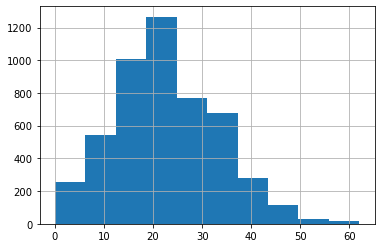

In [ ]:
ld['score_home'].hist()

<AxesSubplot:>

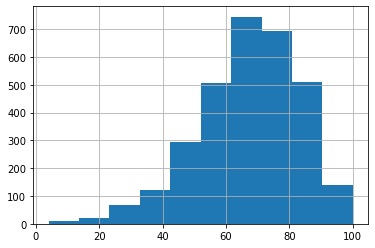

In [ ]:
ld['weather_humidity'].hist()

<AxesSubplot:>

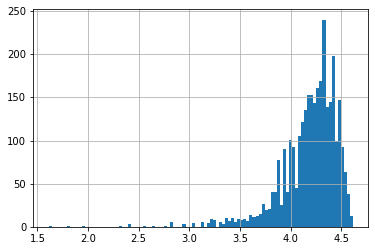

In [ ]:
ld['score_home'] = np.log(ld['weather_humidity']+1)
ld['score_home'].hist(bins=100)

In [ ]:
# view unique values
ld['team_home'].unique()

# split rows into parts
term_split = ld['team_home'].str.split(' ')

# view first five rows
print(term_split[:5])

2      [San, Diego, Chargers]
4       [Green, Bay, Packers]
7          [Atlanta, Falcons]
11    [San, Francisco, 49ers]
12    [St., Louis, Cardinals]
Name: team_home, dtype: object


In [ ]:
# the str function can retrieve a specific list element for all rows
term_split.str[1]
ld['weather_temperature'] = term_split.str[1]

# add this to the dataframe
display(ld['weather_temperature'].head())
# this column is not in integer format. Must fix!

2         Diego
4           Bay
7       Falcons
11    Francisco
12        Louis
Name: weather_temperature, dtype: object

In [ ]:
cols = ['score_home', 'score_away', 'weather_temperature', 'weather_humidity',]
corr = ld[cols].corr()
corr.style.background_gradient(cmap='coolwarm')


,score_away,weather_humidity
score_away,1.000000,-0.006718
weather_humidity,-0.006718,1.000000


In [ ]:
pred_vars = ['score_home', 'score_away', 'weather_temperature', 'weather_humidity']

In [ ]:
print("before dropping rows with missing data", len(ld))
ld = ld.dropna(subset=pred_vars)
print("after dropping rows with missing data", len(ld))

before dropping rows with missing data 3107
after dropping rows with missing data 3107


In [ ]:
from sklearn.model_selection import train_test_split

# use index-based sampling since we have time series data
train, test = train_test_split(ld, test_size=0.25, shuffle=False)

In [ ]:
# earliest and latest dates in train
print("training data starts\n", train['score_away'].head())
print("training data ends\n", train['score_away'].tail())
# earliest and latest in test
print("testing data starts\n", test['score_away'].head())
print("testing data ends\n", test['score_away'].tail())

training data starts
 2      7.0
4      3.0
7     19.0
11    20.0
12    13.0
Name: score_away, dtype: float64
training data ends
 7977    30.0
7984    24.0
7988    27.0
7992    23.0
7997    23.0
Name: score_away, dtype: float64
testing data starts
 7999    14.0
8000    24.0
8001    10.0
8002    27.0
8014    10.0
Name: score_away, dtype: float64
testing data ends
 13218    17.0
13219    17.0
13223    15.0
13226    19.0
13229    27.0
Name: score_away, dtype: float64


In [ ]:
teamsnfl.head(10)

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [ ]:
datascores = datascores.replace(r'^\s*$', np.nan, regex=True)
datascores = datascores[(datascores.score_home.isnull() == False)&(datascores.team_favorite_id.isnull() == False)&(datascores.over_under_line.isnull() == False)&(datascores.schedule_season >= 1980)]
datascores.reset_index(drop=True, inplace=True)

In [ ]:
datascores.loc[(datascores.schedule_week == '18'), 'schedule_week'] = '17'
datascores.loc[(datascores.schedule_week == 'Wildcard') | (datascores.schedule_week == 'WildCard'), 'schedule_week'] = '18'
datascores.loc[(datascores.schedule_week == 'Division'), 'schedule_week'] = '19'
datascores.loc[(datascores.schedule_week == 'Conference'), 'schedule_week'] = '20'
datascores.loc[(datascores.schedule_week == 'Superbowl') | (datascores.schedule_week == 'SuperBowl'), 'schedule_week'] = '21'

In [ ]:
datascores['team_home'] = datascores.team_home.map(teamsnfl.set_index('team_name')['team_id'].to_dict())
datascores['team_away'] = datascores.team_away.map(teamsnfl.set_index('team_name')['team_id'].to_dict())
datascores['over_under_line'] = datascores.over_under_line.astype(float)
datascores['schedule_week'] = datascores.schedule_week.astype(int)
datascores["team_favorite_away"] = (datascores["team_favorite_id"] == datascores["team_away"]).astype(int)
datascores["team_favorite_home"] = (datascores["team_favorite_id"] == datascores["team_home"]).astype(int)
datascores["schedule_playoff"] = datascores["schedule_playoff"].astype(int)
datascores["stadium_neutral"] = datascores["stadium_neutral"].astype(int)
datascores.schedule_season = datascores.schedule_season-2000

dependent Variables: Results


independent variables: stadium, team_away, team_home, weather_humidity

In [ ]:
 # Datascores 

datascores["result"] = (datascores["score_home"]>=datascores["score_away"]).astype(int)
datascores = datascores.drop(["score_away","score_home","team_favorite_id","schedule_date","stadium_neutral","weather_detail"],axis = 1)
datascores = datascores.fillna(0)
datascores["stadium"]=pd.factorize(datascores.stadium)[0]
datascores["team_away"]=pd.factorize(datascores.team_away)[0]
datascores["team_home"]=pd.factorize(datascores.team_home)[0]
datascores['weather_humidity'] = pd.to_numeric(datascores['weather_humidity'])

In [ ]:
from sklearn.model_selection import train_test_split
#using top 10 features from previous part
#data = data.drop(["weather_temperature","weather_wind_mph","weather_humidity","team_favorite_away","team_favorite_home"],1)
labels = np.array(datascores['result'])
train_data= datascores.drop('result', axis = 1)
feature_list = list(train_data.columns)
train_features, test_features, train_labels, test_labels = train_test_split(train_data, labels, test_size = 0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
model.fit(train_features,train_labels)
predictions = model.predict(test_features)
errors = np.sum(abs(predictions - test_labels))/len(predictions)
print('Accuracy ',1 - errors)

#Cross validation
model = DecisionTreeClassifier()
scores = cross_val_score(model,train_data,labels, cv=5)
print('Cross-Validation Accuracy Scores', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores),np.std(scores)))


Accuracy  0.5407058823529411
Cross-Validation Accuracy Scores [0.55576471 0.56470588 0.57647059 0.57552941 0.4180791 ]
Accuracy: 0.538 (0.060)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features,train_labels)
predictions = model.predict(test_features)
errors = np.sum(abs(predictions - test_labels))/len(predictions)
print('Accuracy ',1 - errors)

Accuracy  0.656


In [ ]:

RMSE = {}
from sklearn.ensemble import RandomForestClassifier
modelrf =RandomForestClassifier(n_estimators=150)
train_features, test_features, train_labels, test_labels = train_test_split(train_data, labels, test_size = 0.15)
model.fit(train_features,train_labels)
predictions = model.predict(test_features)
print("Random Forest Classifier")
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels,predictions)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_labels,predictions)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels,predictions)))
print()
RMSE["RandomForestClassifier"] = np.sqrt(metrics.mean_squared_error(test_labels,predictions))

Random Forest Classifier
Mean Absolute Error: 0.33500627352572143
Mean Squared Error: 0.33500627352572143
Root Mean Squared Error: 0.5787972646149266



dependent Variables: Results


independent variables: stadium, team_away, team_home, weather_humidity

datascores= scores

In [ ]:
scoresdf = datascores.groupby('weather_humidity')['score'].agg(['mean', 'count'])
# stats for fraud by count and average transaction amount
print(scoresdf)

                       mean  count
weather_humidity                  
0.0               15.003567   4485
4.0               18.000000      1
5.0               29.000000      1
6.0                7.000000      1
9.0               19.000000      1
...                     ...    ...
96.0              13.357143     28
97.0              12.812500     16
98.0              11.352941     17
99.0              17.200000      5
100.0             20.727273     11

[95 rows x 2 columns]


In [ ]:
train, test = train_test_split(datascores, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))
train_stats = train.groupby('weather_humidity')['team_away'].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('weather_humidity')['team_away'].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 7968
Rows in test: 2656
Training data:
                        mean  count
weather_humidity                  
0.0               15.026718   3406
5.0               29.000000      1
6.0                7.000000      1
9.0               19.000000      1
10.0              21.000000      2
...                     ...    ...
96.0              11.500000     22
97.0              12.230769     13
98.0              12.461538     13
99.0              19.333333      3
100.0             19.111111      9

[94 rows x 2 columns]
Testing data:
                        mean  count
weather_humidity                  
0.0               14.930491   1079
4.0               18.000000      1
12.0              21.000000      1
14.0              21.000000      1
19.0              13.000000      3
...                     ...    ...
96.0              20.166667      6
97.0              15.333333      3
98.0               7.750000      4
99.0              14.000000      2
100.0             28.000000     